# Assignment 3

**Martin, Erik : 250660**  
**Seim, Håvard : 260699**  
**Group: L**  

# Report
*The code, divided into sections, is referred to underneath. The main part of the report is in this section.*

The algorithms in this assignment are based on the `Graph` and `Node` classes implemented [here](#graph-and-node) 

## 1. Problem Basic Graph
| adj | 1 | 2 | 3 | 4 | 5 | 6 |
|-----|---|---|---|---|---|---|
| 1   | 0 | 1 | 0 | 0 | 0 | 0 |
| 2   | 0 | 1 | 1 | 1 | 0 | 0 |
| 3   | 1 | 1 | 0 | 0 | 1 | 0 |
| 4   | 0 | 0 | 0 | 0 | 1 | 1 |
| 5   | 0 | 0 | 1 | 1 | 0 | 0 |
| 6   | 0 | 0 | 0 | 1 | 0 | 0 |

### 1.a.1 
Converting the adjacency matrix to an adjacency list is basically using a list to show what the neighbours of a node is. When we do it, we get the following:

| Node | Neighbours |
|------|------------|
| 1    | 3          |
| 2    | 1, 2, 3    |
| 3    | 2, 5       |
| 4    | 2, 5, 6    |
| 5    | 3, 4       |
| 6    | 4          |

*We are assuming that *in alphabetical order* means that the nodes are sorted by numbers*

### 1.a.2
The adjacency matrix graph is then:
![adja_matrix_graph](./img/adjacency_matrix_graph.png)


### 1.a.3
The adjacency list of graph 1 is:

| Node | Neighbours |
|------|------------|
| A    | B          |
| B    | C, D       |
| C    | E, F       |
| D    | E, F       |
| E    | F, G, J    |
| F    | B, G, H, J |
| G    |            |
| H    | I          |
| I    |            |
| J    | I          |

### 1.b
The DFS and BFS algorithms are traversal algorithms that discover the graph by visiting all the nodes. 

### DFS (Depth First Search) 
DFS is a recursive algorithm. It starts at the root node and explores down as far as possible into the graph. It chooses a neighbour of a node recursively until it reaches a leaf node or an already visited node. It then backtracks and checks for other unvisited neighbours. It continues this until all nodes are visited. 

The code is shown [here](#dfs). It takes a Graph object as the input and returns a list of the nodes in the order they were visited. It is based on the dfs algorithm described on page 604 in the Introduction to Algorithms, where colors are used to keep track of the completed (black), visited (grapy), and undiscovered (white) nodes.

![dfs_animation](./img/dfs.gif)

### BFS (Breadth First Search)
BFS also starts at the root node and explores the graph, however instead of going as deep as possible, it explores the neighbour nodes first. It keeps track of the nodes in a queue and visits the nodes in the order they were discovered until all nodes are visited. In contrast to DFS, the colors for BFS are visited (black), discovered (gray), undiscovererd (white). An animation of how BFS works is shown in the code output.

The code is shown [here](#bfs). As for DFS, it takes a Graph object as the input and returns a list of the nodes in the order they were visited. It is based on the BFS algorithm described in the Introduction to Algorithms, page 595. As with DFS, colors are used to keep track of the nodes and an animation is shown in the code output.

![bfs_animation](./img/bfs.gif)

### 1.c
Removing the edge from F to B makes the graph directed and acyclic, as the edge creates a cycle by looping back to an already visited node. Performing a topological sort is done by applying DFS on the graph to compute finish times. The algoithm sorts a list of the vertices which then becomes the topologically sorted list.

### 1.d
@TODO: By modifying BFS, any back edges are detected and removed by adding an IF statement that checks if a neighbour has been visited (color is black).


## 2. Problem Cable Network
### 2.a
The cable network problem is a problem where all neighbourhoods are reachable from any other neighbourhood in the network.
The travel from one neighbourhood to another has a cost, and we want to see if it is possible to travel between all neighbourhoods without the cost going above 30.

For this problem, we use Minimum Spanning Tree Prim. The algorithm is based on the Prim algorithm described in the Introduction to Algorithms, page 634. 

The algorithm builds a minimum spanning tre
 starting at a single node. The edges of that single node are put in a priority queue based on weight so that the edge with smallest weight is chosen first. When that edge (u, v) is chosen, the v-nodes edges are added to the queue. Edges, that connect to a vertex that already is in the tree, are disregarded. This process runs until all vertices are added to the tree.
It is possible to connect all nodes with the constraint. This can be done using a minimum spanning tree algorithm, here Prim's algorithm was chosen. The result is **26** for any given start node.

The code is shown [here](#mst_prim).

![mst_prim_animation](./img/mst_prim.gif)

### 2.b
For this section, D is limited to three edges. This changes how the algorithm works as, for instance node B, will not be reachable from node D anymore, but instead have to go through node A.

Limiting D to three edges will result in the budget constraint not being met for any start node. The solution does not yield a globally optimal solution, as the start node affects which of D's edges are used, and thus there will be variance in total weight. 

The code is shown [here](#mst_prim).

![mst_prim_animation_limit_d](./img/mst_prim_limit_d.gif)

### 2.c
This section is about checking if the cost can be decreased below 25 if some of the edges are swapped, for instance (A, B) and (C, G). 

The algorithm finds all edges in the graph, runs all single swap combinations for edges through Prim's algorithm on the graph and returns the first case of the constraint being satisfied, in our case swapping edge (A, B) with (B, H), resulting in total weight **24**.

The code is shown [here](#mst-swap-edges).

## 3. Problem Finding Champions
### 3.a
Problem 3 is regarding the graph as a sort of turnament where the nodes that are directly connected have fought against each other, and the direction of the edge indicates the winner. If A -> D and D -> C, but A didn't fight C, then A is the indirect winner of C. 

To find the champion, if it exists, which is the node that has won against all other nodes, either directly or indirectly, we use the BFS algorithm on each node. The champion is the node that has a visited result that is equal to the number of nodes in the graph. This is because BFS al traverses the graph and checks which nodes are reachable from the start node. 

After running the nodes through the BFS algorithm, we get the following results:
["A", "B", "D"] as the champions. This is because A has won against B and D, B has won against A, and D has won against B.

![finding_champions](./img/bfs_champions.png)

The code is shown [here](#finding-champions).

### 3.b
This task is to divide the graph into groups that is comprised of nodes that have defeated each other. This type of task, where you 

The code is shown [here](#finding-groups).

## 4. Problem Shortest Path
The shortest path problem is a problem with the Dijkstra algorithm, where if there is a negative edge in the graph, the algorithm will not work correctly. This is because Dijkstra's algorithm marks a node as visited when it has the shortest path to that node is found, but if there is a "longer path" to that node, that includes a negative edge, the algorithm will not revisit that node.

![dijsktra](./img/dijkstra.gif)

Here is an example of when the algorithm fails. It found node D with a cost of B -> D which is 2, but the shortest path is B -> A -> C -> D which is -5.

The code is shown [here](#dijkstra).


To fix the problem with the Dijkstra algorithm, the Bellman-Ford algorithm should be used. The BF algorithm can handle negative weights, but it is slower than Dijkstra. It can also detect negative cycles by running the algorithm an additional time and checking if the distance to a node is reduced.

The Bellman-Ford algorithm works by iterating over the edges multiply times in different runs. The first run initializes the distance to all nodes based on the edges. The next run uses the previous run's results to update the distance to the nodes if a shorter path is found. This continues for V-1 runs. At the end, it checks if the distance can be further reduced by iterating over the edges an additional time. If so, a negative cycle is detected and the algorithm returns False.

The code is shown [here](#bellman-ford).

![bellman_ford](./img/bellman_ford.gif)

## 5. Problem Maximum Flow


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import time
import copy
import random

from IPython.display import clear_output, HTML
from matplotlib.animation import FuncAnimation

# 1. Problem Basic Graph

## 2. Draw the adjacency matrix in graph form.
We use networkx to draw the nodes and edges.

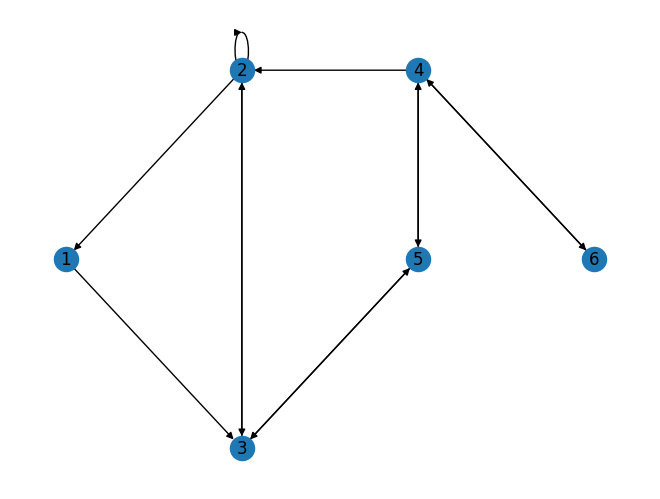

In [2]:
G = nx.DiGraph()
# Node 1
G.add_edge(1, 3)
# Node 2
G.add_edge(2, 1)
G.add_edge(2, 2)
G.add_edge(2, 3)
# Node 3
G.add_edge(3, 2)
G.add_edge(3, 5)
# Node 4
G.add_edge(4, 2)
G.add_edge(4, 5)
G.add_edge(4, 6)
# Node 5
G.add_edge(5, 3)
G.add_edge(5, 4)
# Node 6
G.add_edge(6, 4)

nx.draw(
    G,
    with_labels=True,
    pos={1: (0, -1), 2: (1, -0.5), 3: (1, -1.5), 4: (2, -0.5), 5: (2, -1), 6: (3, -1)},
)

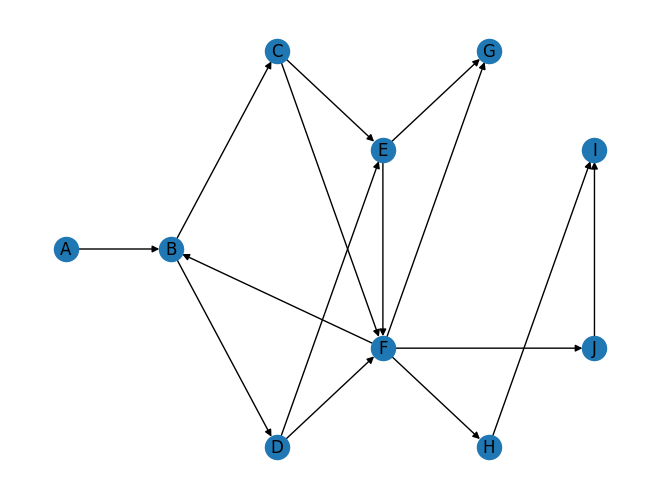

In [3]:
G = nx.DiGraph()

G.add_edge("A", "B")

G.add_edge("B", "C")
G.add_edge("B", "D")

G.add_edge("C", "E")
G.add_edge("C", "F")

G.add_edge("D", "E")
G.add_edge("D", "F")

G.add_edge("E", "F")
G.add_edge("E", "G")

G.add_edge("F", "B")
G.add_edge("F", "G")
G.add_edge("F", "H")
G.add_edge("F", "J")

G.add_edge("H", "I")

G.add_edge("J", "I")


nx.draw(
    G,
    with_labels=True,
    pos={
        "A": (0, 0),
        "B": (1, 0),
        "C": (2, 0.5),
        "D": (2, -0.5),
        "E": (3, 0.25),
        "F": (3, -0.25),
        "G": (4, 0.5),
        "H": (4, -0.5),
        "I": (5, 0.25),
        "J": (5, -0.25),
    },
)

# Graph and Node

In [4]:
import base64
from typing import Literal


class Node:
    def __init__(self, name: str, neighbours: list[tuple[str, int]] = []):
        self.name = name
        self.weights = {}
        self.neighbours: list[Node] = neighbours
        self.color = (
            "white"  # White before u.d time, gray between u.d and u.f and black after
        )
        self.pi: Node = None  # Predecessor node
        self.d = np.inf  # Discovery time
        self.f = np.inf  # Finishing time

    def __str__(self):
        neighbours = [(n.name, self.weights[n.name]) for n in self.neighbours]
        return f"{self.name}: {neighbours}"

    def __repr__(self):
        return self.__str__()


class Graph:
    def __init__(
        self, nodes: list[Node] = [], pos: dict[str, tuple[int, int]] | None = None
    ):
        self.nodes = sorted(nodes, key=lambda x: x.name)
        self.pos = pos
        self.snapshot = []

        self.neighbour_to_node()

    def __repr__(self):
        return {node.name: node.weights for node in self.nodes}

    def neighbour_to_node(self):
        for node in self.nodes:
            old_neighbours = node.neighbours
            node.neighbours = []
            for neighbour in old_neighbours:
                node.weights[neighbour[0]] = neighbour[1]
                if isinstance(neighbour, Node):
                    continue
                node.neighbours.append(self.get(neighbour[0]))

    def swap_edge_direction(self, node_name: str, neighbour_name: str) -> None:
        node = self.get(node_name)
        edge_weight = node.weights.pop(neighbour_name, None)
        edge = self.pop_edge(node_name, neighbour_name)

        neighbour = self.get(neighbour_name)
        neighbour_edge_weight = neighbour.weights.pop(node_name, None)
        neighbour_edge = self.pop_edge(neighbour_name, node_name)

        if edge:
            neighbour.weights[node_name] = edge_weight
            neighbour.neighbours.append(node)

        if neighbour_edge:
            node.weights[neighbour_name] = neighbour_edge_weight
            node.neighbours.append(neighbour)

    def get(self, name: str) -> Node | None:
        for node in self.nodes:
            if node.name == name:
                return node
        return None

    def names(self) -> list[str]:
        return [n.name for n in self.nodes]

    def pop_edge(self, node_name: str, neighbour_name: str) -> Node | None:
        node = self.get(node_name)
        old_neighbours = node.neighbours
        for i, n in enumerate(old_neighbours):
            if n.name == neighbour_name:
                return node.neighbours.pop(i)
        return None

    def add_edge(self, node_name: str, neighbour_name: str, weight: int = 0) -> int:
        node = self.get(node_name)
        neighbour = self.get(neighbour_name)
        if all(isinstance(n, Node) for n in [node, neighbour]):
            node.neighbours.append(neighbour)
            node.weights[neighbour_name] = weight
            return 1
        return 0

    def remove_edges(self) -> None:
        for node in self.nodes:
            node.neighbours = []
            node.weights = {}
        pass

    def add_node(self, node_name: str) -> int:
        if self.get(node_name) == None:
            self.nodes.append(Node(node_name))
        pass

    def check_neighbour(self, node: Node, neighbour: Node) -> bool:
        if node.weights.get(neighbour.name, None):
            return True
        return False

    def swap_edge(self, edge1: tuple[str, str], edge2: tuple[str, str]) -> int:
        node1, neighbour1 = (self.get(edge1[0]), self.get(edge1[1]))
        node2, neighbour2 = (self.get(edge2[0]), self.get(edge2[1]))
        nodes = [node1, neighbour1, node2, neighbour2]
        if all(isinstance(node, Node) for node in nodes):
            if self.check_neighbour(node1, neighbour1) and self.check_neighbour(
                node2, neighbour2
            ):
                n1_weight = node1.weights[neighbour1.name]
                n2_weight = node2.weights[neighbour2.name]
                node1.weights[neighbour1.name] = neighbour1.weights[node1.name] = (
                    n2_weight
                )
                node2.weights[neighbour2.name] = neighbour2.weights[node2.name] = (
                    n1_weight
                )
                return 1
        return 0

    def transpose(self) -> None:
        swapped: list[tuple[str, str]] = []
        for node in self.nodes:
            for neighbour in node.neighbours:
                if (neighbour.name, node.name) not in swapped or (
                    node.name,
                    neighbour.name,
                ) not in swapped:
                    self.swap_edge_direction(node.name, neighbour.name)
                    swapped.append((node.name, neighbour.name))

    def graphical(
        self,
        graph_type: Literal["Graph", "DiGraph"] = "DiGraph",
        show_weights=False,
        show_both_weights=False,
    ):
        G = getattr(nx, graph_type)()
        for node in self.nodes:
            G.add_node(node.name, color=node.color)
            for neighbour in self.get(node.name).neighbours:
                if (node.name, neighbour.name) not in G.edges():
                    G.add_edge(
                        node.name, neighbour.name, weight=node.weights[neighbour.name]
                    )

        c = [self.get(node).color for node in G.nodes()]
        nx.draw_networkx_nodes(G, node_color=c, pos=self.pos, edgecolors="tab:gray")
        nx.draw_networkx_labels(
            G, pos=self.pos, labels={node: node for node in G.nodes()}, font_color="red"
        )
        nx.draw_networkx_edges(
            G,
            self.pos,
            edgelist=G.edges(),
            connectionstyle="arc3,rad=0.2" if show_both_weights else "arc3",
        )
        if show_weights:
            edge_labels = dict(((u, v), d["weight"]) for u, v, d in G.edges(data=True))

            nx.draw_networkx_edge_labels(
                G,
                self.pos,
                edge_labels=edge_labels,
                label_pos=0.7 if show_both_weights else 0.5,
            ),


def animate_graph(
    G: Graph, graph_type: Literal["Graph", "DiGraph"] = "DiGraph", show_weights=False
):
    fig, ax = plt.subplots()
    stack_text = ax.text(0.02, 0.95, "", transform=ax.transAxes)

    def update(num):
        ax.clear()
        if isinstance(G.snapshot[num], tuple):
            nodes, stack = G.snapshot[num]
        else:
            nodes = G.snapshot[num]
            stack = []
        nodes.graphical(graph_type=graph_type, show_weights=show_weights)
        plt.
        if isinstance(stack, list):
            stack_text.set_text("Stack: " + " | ".join(stack))
        else:
            stack_text.set_text(f"Costs: {stack}")
        ax.add_artist(stack_text)

    ani = FuncAnimation(
        fig, update, frames=len(G.snapshot), interval=1000, repeat=False
    )
    # gif_filename = "img/animation.gif"
    # ani.save(gif_filename, writer="imagemagick", fps=1)
    # with open(gif_filename, "rb") as file:
    #     display(
    #         HTML(
    #             '<img src="data:image/gif;base64,{}">'.format(
    #                 base64.b64encode(file.read()).decode("utf-8")
    #             )
    #         )
    #     )
    return HTML(ani.to_html5_video())

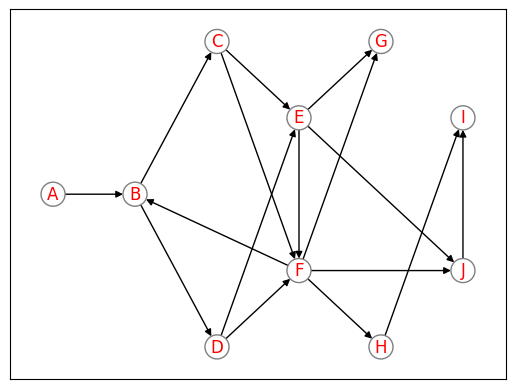

In [5]:
graph = Graph(
    nodes=[
        Node("A", [("B", 1)]),
        Node("B", [("C", 1), ("D", 1)]),
        Node("C", [("E", 1), ("F", 1)]),
        Node("D", [("E", 1), ("F", 1)]),
        Node("E", [("F", 1), ("G", 1), ("J", 1)]),
        Node("F", [("B", 1), ("G", 1), ("H", 1), ("J", 1)]),
        Node("G", []),
        Node("H", [("I", 1)]),
        Node("I", []),
        Node("J", [("I", 1)]),
    ],
    pos={
        "A": (0, 0),
        "B": (1, 0),
        "C": (2, 0.5),
        "D": (2, -0.5),
        "E": (3, 0.25),
        "F": (3, -0.25),
        "G": (4, 0.5),
        "H": (4, -0.5),
        "I": (5, 0.25),
        "J": (5, -0.25),
    },
)

graph.graphical()

# BFS
*Implemented using the pseudocode from p.595 Introduction to Algorithms*


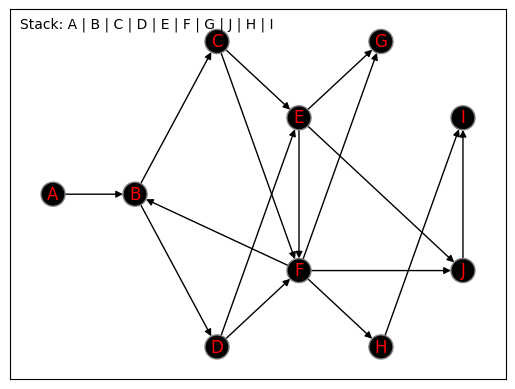

In [6]:
def bfs(G: Graph, s_string: str = "A") -> tuple[list[str], Graph]:
    for u in G.nodes:
        u.color = "white"
        u.pi = None
        u.d = 0
        u.f = 0
    queue = []
    order = []
    time = 0
    s = G.get(s_string)
    s.color = "gray"
    s.d = 0
    queue.append(s)
    while len(queue) > 0:
        time += 1
        u = queue.pop(0)
        order.append(u.name)
        for neighbour in u.neighbours:
            v = G.get(neighbour.name)
            if v.color == "white":
                v.color = "gray"
                v.d = time
                v.pi = u
                queue.append(v)
        u.color = "black"
        u.f = time
        G.snapshot.append((copy.deepcopy(G), copy.deepcopy(order)))
    return order, G


breadth, G_copy = bfs(copy.deepcopy(graph), "A")
display(breadth)

clear_output()
animate_graph(G_copy)

# DFS
*Implemented using the pseudocode from p.604 Introduction to Algorithms*

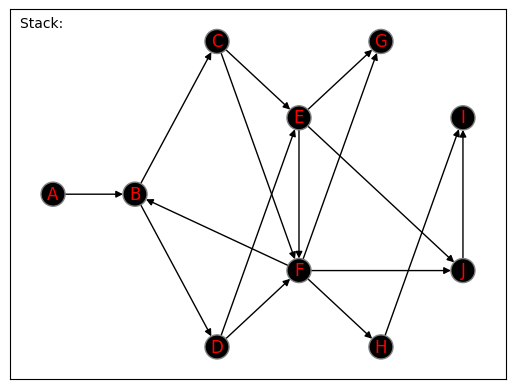

In [7]:
def dfs(
    G: Graph, initial_node: str = "A", order_decreasing: bool = False
) -> tuple[list[str], Graph]:
    """Algorithm for depth first search

    Args:
        G: Graph object of nodes.
        order_decreasing: If True, the nodes are visited in decreasing order.

    Returns:
        A visited list and the graph.
    """

    def dfs_visiting(u: Node) -> tuple[list[str], set]:
        time[0] += 1
        u.d = time[0]
        u.color = "gray"
        stack.append(u.name)
        visited.add(u.name)
        snapshots.append((copy.deepcopy(G), copy.deepcopy(stack)))
        for v in G.get(u.name).neighbours:
            if v.color == "white":
                v.pi = u
                dfs_visiting(v)
        stack.pop()
        time[0] += 1
        u.f = time[0]
        u.color = "black"
        finishing_times.append(u)
        snapshots.append((copy.deepcopy(G), copy.deepcopy(stack)))

    snapshots = []
    visited = set()
    stack = []
    time = [0]
    finishing_times = []

    for u in G.nodes:
        u.d, u.f = 0, 0
        u.color = "white"
        u.pi = None

    nodes = G.nodes
    if order_decreasing:
        nodes = sorted(G.nodes, key=lambda x: x.f, reverse=True)
    for u in nodes:
        if u.color == "white":
            snapshots.append((copy.deepcopy(G), copy.deepcopy(stack)))
            dfs_visiting(u)
    G.snapshot = snapshots
    return visited, G


visits, G = dfs(copy.deepcopy(graph))
animate_graph(G)

## 1. c)
Removing the edge from F to B makes the graph directed and acyclic. 

In [8]:
def topological(G: Graph) -> list:
    result = []
    dfs(G)
    nodes = sorted(G.nodes, key=lambda x: x.f, reverse=True)
    for node in nodes:
        result.append(f"{node.name}: {node.f}")
    return result


c_graph = copy.deepcopy(graph)
c_graph.pop_edge("F", "B")
print(topological(c_graph))

['A: 20', 'B: 19', 'D: 18', 'C: 16', 'E: 15', 'F: 14', 'J: 13', 'H: 11', 'I: 10', 'G: 7']


## 1. d)

By modifying BFS, any back edges are detected and removed by adding an IF statement that checks if a neighbour has been visited (color is black).


In [9]:
def convertToDAG(G: Graph, s_string: str) -> Graph:
    queue = []
    for u in G.nodes:
        u.color = "white"
        u.pi = None
        u.d = 0
        u.f = 0
    s = G.get(s_string)
    s.color = "gray"
    s.d = 0
    queue.append(s)
    while len(queue) > 0:
        u = queue.pop(0)
        old_neighbours = u.neighbours
        for i, neighbour in enumerate(old_neighbours):
            v = G.get(neighbour.name)
            if v.color == "white":
                v.color = "gray"
                v.d = u.d + 1
                v.pi = u
                queue.append(v)
            elif v.color == "black":
                print(f"Removing {u.name} -> {v.name}")
                G.pop_edge(u.name, v.name)
        u.color = "black"
        G.snapshot.append(copy.deepcopy(G))
    return G

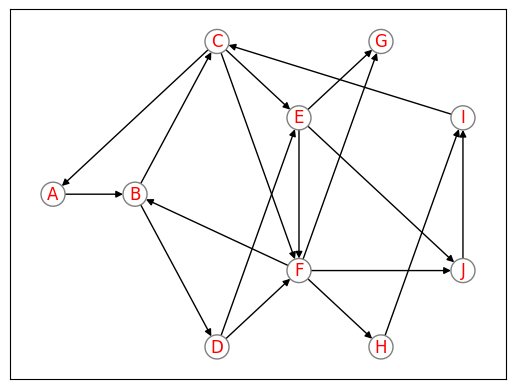

In [10]:
D_graph = copy.deepcopy(graph)
D_graph.add_edge("I", "C")
D_graph.add_edge("C", "A")

D_graph.graphical()

Removing C -> A
Removing F -> B
Removing I -> C


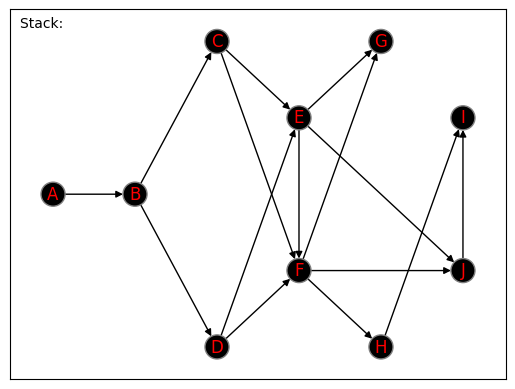

In [11]:
D_graph = convertToDAG(D_graph, "A")

animate_graph(D_graph)

# 2. Problem Cable Network

Initialization of the Graph:

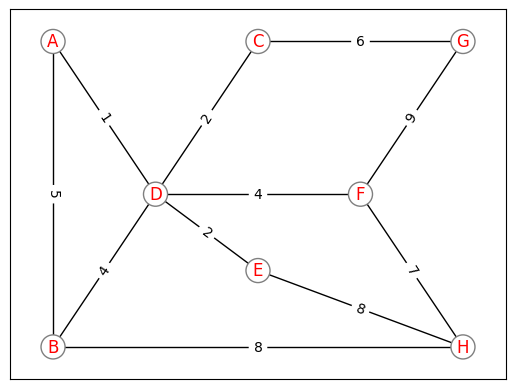

In [12]:
graph2 = Graph(
    nodes=[
        Node("A", [("B", 5), ("D", 1)]),
        Node("B", [("A", 5), ("D", 4), ("H", 8)]),
        Node("C", [("D", 2), ("G", 6)]),
        Node("D", [("A", 1), ("B", 4), ("C", 2), ("E", 2), ("F", 4)]),
        Node("E", [("D", 2), ("H", 8)]),
        Node("F", [("D", 4), ("G", 9), ("H", 7)]),
        Node("G", [("C", 6), ("F", 9)]),
        Node("H", [("B", 8), ("E", 8), ("F", 7)]),
    ],
    pos={
        "A": (0, 0.5),
        "B": (0, -0.5),
        "C": (2, 0.5),
        "D": (1, 0),
        "E": (2, -0.25),
        "F": (3, 0),
        "G": (4, 0.5),
        "H": (4, -0.5),
        "I": (5, 0.25),
        "J": (5, -0.25),
    },
)
# for node in graph2.nodes:
#     print(node)
graph2.graphical(graph_type="Graph", show_weights=True)

# MST Prim

33


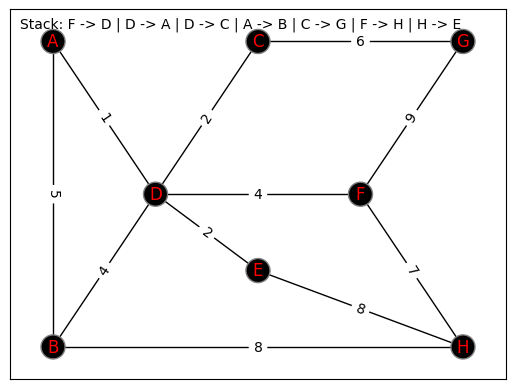

In [13]:
def MST_Prim(
    G: Graph, b: int, s: str, max_edges: int | None = None
) -> tuple[int, Graph]:
    weight_total = 0
    edges = []
    snapshot = []
    initial_node = G.get(s)
    initial_node.color = "black"
    visited = {initial_node.name: 0}
    stack = []
    snapshot.append((copy.deepcopy(G), stack[:]))

    # Adds initial edges of start vertex into queue, with form
    for n_name, n_weight in initial_node.weights.items():
        G.get(n_name).color = "gray"
        edges.append((n_weight, n_name, initial_node.name))
    edges = sorted(edges, key=lambda x: x[0])
    snapshot.append((copy.deepcopy(G), stack[:]))

    while len(visited) < len(G.nodes):
        next_node = edges.pop(0)
        weight, d_node, s_node = next_node[0], next_node[1], next_node[2]

        if d_node in visited:
            continue
        # To accomodate for the restriction in b)
        elif max_edges is not None and visited[s_node] >= max_edges:
            continue
        else:
            stack.append(f"{s_node} -> {d_node}")
            visited[d_node] = 1
            visited[s_node] += 1
            weight_total += weight

            next_node = G.get(d_node)
            next_node.color = "black"
            for n_name, n_weight in next_node.weights.items():
                if n_name in visited:
                    continue
                else:
                    G.get(n_name).color = "gray"
                    edges.append((n_weight, n_name, next_node.name))
            edges = sorted(edges, key=lambda x: x[0])
            snapshot.append((copy.deepcopy(G), stack[:]))
        # print(visited)
    G.snapshot = snapshot
    return weight_total, G


n, visits = MST_Prim(copy.deepcopy(graph2), 30, "F", max_edges=3)
animate_graph(visits, "Graph", show_weights=True)
print(n)

# MST Swap Edges

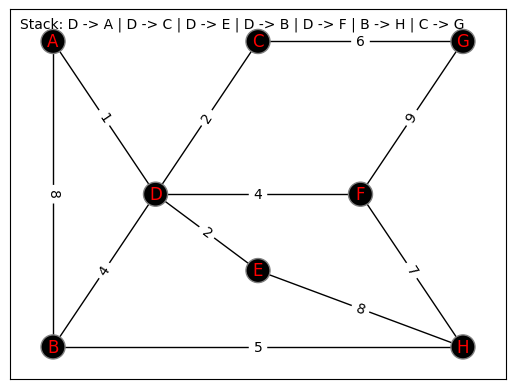

In [14]:
def MSTswapEdges(G: Graph, b: int) -> tuple[bool, Graph]:
    edges = dict()
    for node in G.nodes:
        for neighbour in node.neighbours:
            edge = tuple(sorted([node.name, neighbour.name]))
            if edge not in edges:
                edges[edge] = node.weights[neighbour.name]
    edge_list = list(edges.items())
    lowest = [np.inf, ""]

    # result_edges = []
    # success = False
    for i in range(0, len(edge_list) - 1):
        for j in range(i + 1, len(edge_list)):
            g = copy.deepcopy(G)
            g.swap_edge(edge_list[i][0], edge_list[j][0])
            n, _ = MST_Prim(g, b, "D")
            if n < lowest[0]:
                lowest = [n, f"{str(edge_list[i])} + {str(edge_list[j])}"]
            if n <= b:
                return True, g

    return False, None


_, result = MSTswapEdges(copy.deepcopy(graph2), 25)
animate_graph(result, "Graph", show_weights=True)

C)
The algorithm finds all edges in the graph, runs through all swap combinations for pairs of edges and returns the first case of the constraint being satisfied, that being swapping edge (A, B) with (B, H), resulting in total weight 24.

# 3. Problem Finding Champion

We used Breadth-First Search to find the nodes that are reachable from each node. Since the champion node can *win* indirectly, it should be reachable from the main node without having an edge to it. That's why BFS works for this since it returns all the connected nodes. The node is a champion if the number of reachable nodes is equal to the number of nodes available in the graph G. 

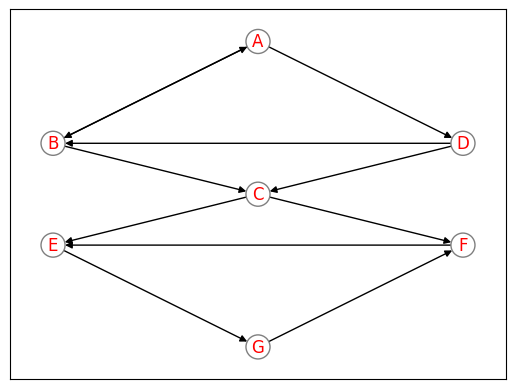

In [15]:
graph3 = Graph(
    nodes=[
        Node("A", [("B", 0), ("D", 0)]),
        Node("B", [("A", 0), ("C", 0)]),
        Node("C", [("E", 0), ("F", 0)]),
        Node("D", [("B", 0), ("C", 0)]),
        Node("E", [("G", 0)]),
        Node("F", [("E", 0)]),
        Node("G", [("F", 0)]),
    ],
    pos={
        "A": (0, 0),
        "B": (-1, -1),
        "C": (0, -1.5),
        "D": (1, -1),
        "E": (-1, -2),
        "F": (1, -2),
        "G": (0, -3),
    },
)

graph3.graphical(graph_type="DiGraph")

# Finding champions

In [16]:
def finding_champion(G: Graph) -> list[str]:
    champions = []
    for node in G.nodes:
        connected_nodes, _ = bfs(copy.deepcopy(G), node.name)
        if len(connected_nodes) == len(G.nodes):
            champions.append(node.name)
    return champions


finding_champion(copy.deepcopy(graph3))

['A', 'B', 'D']

In [17]:
def strongly_connected_dfs(G: Graph, s: str) -> list[str]:
    def strongly_connected_dfs_visit(u: Node):
        visited.add(u.name)
        for v in u.neighbours:
            if v.color == "white":
                v.color = "gray"
                v.pi = u
                strongly_connected_dfs_visit(v)
        v.color = "black"

    visited = set()
    strongly_connected_dfs_visit(G.get(s))
    return visited


def strongly_connected_components(G):
    dfs(G)
    finishing_times = [
        (node.name, node.f) for node in sorted(G.nodes, key=lambda x: x.f, reverse=True)
    ]

    G.transpose()
    for node in G.nodes:
        node.color = "white"
        node.pi = None
        node.f = 0
    for node in sorted(G.nodes, key=lambda x: x.f, reverse=True):
        visited = strongly_connected_dfs(G, node.name)
        print(visited)

    display(visited)
    finishing_times_transponsed = [
        (node.name, node.f) for node in sorted(G.nodes, key=lambda x: x.f, reverse=True)
    ]
    display(finishing_times)
    display(finishing_times_transponsed)

    sccs = []
    for node in [G.get(node[0]) for node in finishing_times_transponsed]:
        if node.pi is None or node.pi not in visited:
            scc = [node.name]
            current = node
            for v in visited:
                v = G.get(v)
                if v.pi == current:
                    scc.append(v.name)
                    current = v
            sccs.append(scc)

    return sccs


strongly_connected_components(copy.deepcopy(graph3))

{'F', 'G', 'B', 'A', 'D', 'E', 'C'}
{'B'}
{'C'}
{'D'}
{'E'}
{'F'}
{'G'}


{'G'}

[('A', 14), ('D', 13), ('B', 11), ('C', 10), ('E', 9), ('G', 8), ('F', 7)]

[('A', 0), ('B', 0), ('C', 0), ('D', 0), ('E', 0), ('F', 0), ('G', 0)]

[['A'], ['B'], ['C'], ['D'], ['E'], ['F', 'G'], ['G']]

3

a)

b)
To divide the graph into groups we can check for strongly connected components.  

# 4. Problem Shortest Path



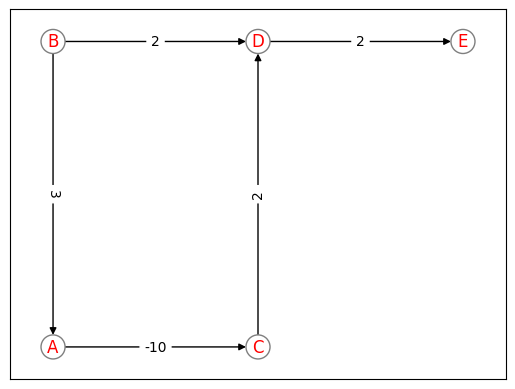

In [18]:
graph4 = Graph(
    [
        Node("A", [("C", -10)]),
        Node("B", [("A", 3), ("D", 2)]),
        Node("C", [("D", 2)]),
        Node("D", [("E", 2)]),
        Node("E", []),
    ],
    pos={"A": (0, 0), "B": (0, 1), "C": (1, 0), "D": (1, 1), "E": (2, 1)},
)
graph4.graphical(show_weights=True)

# Dijkstra

{'A': 3, 'B': 0, 'C': -7, 'D': 2, 'E': 4}


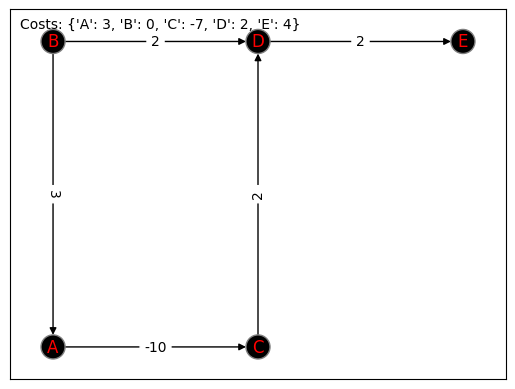

In [19]:
def relax(u: Node, v: Node) -> None:
    if v.d > u.d + u.weights[v.name]:
        v.d = u.d + u.weights[v.name]
        v.pi = u


def initialize_single_source(G: Graph, s: str) -> None:
    for node in G.nodes:
        node.d = np.inf
        node.pi = None
    G.get(s).d = 0


def dijkstra(G: Graph, initial: str) -> tuple[dict[str, int], Graph]:
    # Initialize distances and predecessors
    initialize_single_source(G, initial)
    S = []
    Q = copy.deepcopy(G.nodes)
    while Q:
        u = min(Q, key=lambda x: x.d)
        node = G.get(u.name)
        node.color = "black"
        node.d = u.d

        Q.remove(u)
        S.append(u)
        for v in u.neighbours:
            n_node = G.get(v.name)
            if n_node.color == "black":
                continue
            n_node.d = u.d + u.weights[v.name]
            n_node.color = "gray"
            relax(u, v)
        G.snapshot.append((copy.deepcopy(G), {node.name: node.d for node in G.nodes}))

    return {node.name: node.d for node in G.nodes}, G


costs, G = dijkstra(copy.deepcopy(graph4), "B")
print(costs)
animate_graph(G, show_weights=True)

# Bellman-Ford

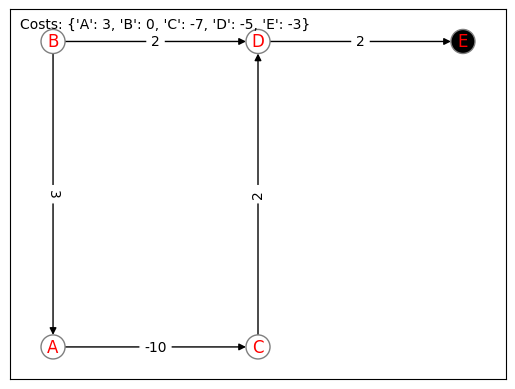

In [20]:
def bellman_ford(G, s):
    initialize_single_source(G, s)
    snapshot = []
    for _ in range(len(G.nodes) - 1):
        snapshot.append((copy.deepcopy(G), {node.name: node.d for node in G.nodes}))
        for u in G.nodes:
            node = G.get(u.name)
            node.color = "black"
            for v in u.neighbours:
                n_node = G.get(v.name)
                n_node.color = "gray"
                n_node.d = u.d + u.weights[v.name]
                relax(u, v)
            snapshot.append((copy.deepcopy(G), {node.name: node.d for node in G.nodes}))
            for u in G.nodes:
                node = G.get(u.name)
                node.color = "white"
    for u in G.nodes:
        for v in u.neighbours:
            if v.d > u.d + u.weights[v.name]:
                return False, G
    G.snapshot = snapshot
    return True, G


is_negative_cycle, G = bellman_ford(copy.deepcopy(graph4), "B")
animate_graph(G, show_weights=True)

# 5. Problem Maximum Flow

Correction

For problem 5 b) it is sufficient to only show some steps and the final result. There is no need to make the report very long.
If you implement the algorithm and use it to solve the problem than this solution is also valid. In your report you should show the main part of the implementation and a reference to your github repo, if you have one.
